In [1]:
import pandas as pd
import numpy as np
import datetime as dt
# import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import matplotlib.style as style
style.use('seaborn-whitegrid')

import os
import re
import pickle
from collections import defaultdict, OrderedDict

In [2]:
from sklearn.model_selection import train_test_split

ImportError: No module named 'sklearn.model_selection'

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_squared_error

In [3]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.applications import VGG16
from keras.optimizers import SGD
from PIL import Image

Using TensorFlow backend.


In [4]:
import warnings
warnings.filterwarnings(action='once')

In [5]:
# Set pandas options
# pd.set_option('max_rows', 10)
# pd.set_option('max_colwidth', -1)
# pd.set_option('display.width', 150)
pd.set_option('display.max_rows', 30)
# pd.set_option('display.max_columns', None)

Login to your AWS instance and start a "jupyter notebook"

**In your local machine on a separate terminal start an SSH tunnel by doing:**

ssh -NL 8899:localhost:8888 udacity@{publicip}

Go to your browser and type http://localhost:8899

Copy the [AWS notebook](AWS.ipynb) to your server via Upload

**DON'T FORGET TO STOP YOUR MACHINE AFTER YOU ARE DONE**

In [5]:
df = pd.read_csv('data/sign_language_data/sign_mnist_train.csv')

In [6]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [35]:
df.shape

(27455, 785)

In [32]:
arr = df.iloc[12,1:].values

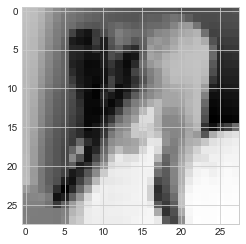

In [33]:
plt.imshow(arr.reshape(28,28))

### Train-Test Split

In [45]:
X = df.iloc[:, 1:]
y = df.iloc[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

### Open images and convert to NumPy arrays

In [15]:
pic = Image.open('data/gestures_data/00/01_palm/frame_00_01_0001.png')

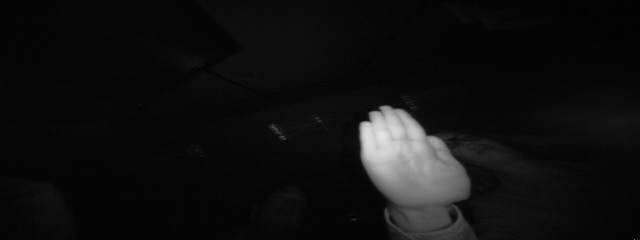

In [16]:
pic

In [17]:
a = np.asarray(pic)

In [25]:
!open .

In [29]:
a_array = pd.DataFrame(a)

In [34]:
max(a_array)

639

In [36]:
os.path.abspath(os.path.join('..', 'input'))

'/Users/brenner/input'

In [4]:
! open /Users/brenner/project_kojak/data/gestures_data

In [37]:
keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

/Users/brenner/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:55: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))


In [18]:
lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir('/Users/brenner/project_kojak/data/gestures_data/00'):
    if not j.startswith('.'):
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1
reverselookup

{0: '05_thumb',
 1: '08_palm_moved',
 2: '02_l',
 3: '01_palm',
 4: '07_ok',
 5: '10_down',
 6: '06_index',
 7: '09_c',
 8: '03_fist',
 9: '04_fist_moved'}

In [2]:
x_data = []
y_data = []

def get_arrays_from_images(path):
datacount = 0
for i in range(0, 10):
    for j in os.listdir('/home/carnd/home/data/gestures_data/0' + str(i) + '/'):
        if not j.startswith('.'): # Again avoid hidden folders
            count = 0 # To tally images of a given gesture
            for k in os.listdir('/home/carnd/home/data/gestures_data/0' + 
                                str(i) + '/' + j + '/'):
                                # Loop over the images
                img = Image.open('/home/carnd/home/data/gestures_data/0' + 
                                 str(i) + '/' + j + '/' + k).convert('L')
                                # Read in and convert to greyscale
                img = img.resize((224, 224))
                arr = np.array(img)
                x_data.append(arr) 
                count = count + 1
            y_values = np.full((count, 1), lookup[j]) 
            y_data.append(y_values)
            datacount = datacount + count
            print(datacount)

In [6]:
y_data = np.array(y_data)

In [7]:
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1) # Reshape to be the correct size

In [8]:
x_data.shape

(20000, 224, 224)

In [22]:
from random import randint
for i in range(0, 10):
    plt.imshow(x_data[i*200 , :, :])
    plt.title(reverselookup[y_data[i*200 ,0]])
    plt.show()

NameError: name 'x_data' is not defined

In [10]:
from keras.utils import to_categorical
y_data = to_categorical(y_data)

In [11]:
x_data.shape

(20000, 224, 224)

In [12]:
x_data = x_data.reshape((datacount, 224, 224, 1))
x_data /= 255

In [13]:
x_data.shape

(20000, 224, 224, 1)

In [14]:
from sklearn.cross_validation import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

In [40]:
### Modified

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from keras.optimizers import SGD

import numpy as np

#Get back the convolutional part of a VGG network trained on ImageNet
model_vgg16_conv = VGG16(
                        weights='imagenet',
                        include_top=False,
                        )
model_vgg16_conv.summary()

#Create your own input format (here 224x224x3)
input = Input(shape=(224,224,3),name = 'image_input')

# makes the layers non-trainable
for layer in model_vgg16_conv.layers:
    layer.trainable=False
    
#Use the generated model 
output_vgg16_conv = model_vgg16_conv(input)
    
#Add the fully-connected layers 
x = Flatten(name='flatten')(output_vgg16_conv)
# x = Dense(4096, activation='relu', name='fc1')(x)
# x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(10, activation='softmax', name='predictions')(x) # here the 2 indicates binary (3 or more is multiclass)

#Create your own model 
my_model = Model(input=input, output=x)

#In the summary, weights and layers from VGG part will be hidden, but they will be fit during the training
my_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

IndexError: list index out of range

In [15]:
from keras import models, layers

model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(224, 224,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [16]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(x_train, y_train, epochs=5, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

Train on 16000 samples, validate on 2000 samples
Epoch 1/5
16000/16000 [==============================] - 164s 10ms/step - loss: 0.0265 - acc: 0.9934 - val_loss: 3.5357e-04 - val_acc: 1.0000
Epoch 2/5
16000/16000 [==============================] - 162s 10ms/step - loss: 0.0144 - acc: 0.9974 - val_loss: 1.4116e-04 - val_acc: 1.0000
Epoch 3/5
16000/16000 [==============================] - 163s 10ms/step - loss: 0.0110 - acc: 0.9981 - val_loss: 7.1928e-05 - val_acc: 1.0000
Epoch 4/5
16000/16000 [==============================] - 162s 10ms/step - loss: 0.0050 - acc: 0.9989 - val_loss: 0.0027 - val_acc: 0.9990
Epoch 5/5
16000/16000 [==============================] - 163s 10ms/step - loss: 0.0049 - acc: 0.9995 - val_loss: 0.0019 - val_acc: 0.9995


In [ ]:
model.

In [ ]:
model.summary()

In [24]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

2000/2000 [==============================] - 6s 3ms/step
Accuracy:1.0


In [ ]:
model

In [23]:
model.save('my_model.h5')

In [21]:
!ls

1 - EDA.ipynb  anaconda3  home	my_model.h5  test.py  x_data.pickle


In [3]:
!open .

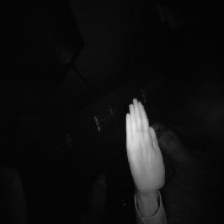

In [43]:
img = Image.open('data/gestures_data/00/01_palm/frame_00_01_0001.png').convert('L')
                                # Read in and convert to greyscale
img = img.resize((224, 224))
img

In [41]:
!pwd

/Users/brenner/project_kojak
